In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data_X_train=mnist.train.images
data_X_test=mnist.test.images
data_Y_trn=mnist.train.labels
data_Y_tst=mnist.test.labels

In [4]:
#Converting y label from one hot code to categorical 

data_Y_train=[]
for j in range(55000):
    for i in range(10):
        if data_Y_trn[j][i]>0.8:
            data_Y_train.append(i)
print(len(data_Y_train))


data_Y_test=[]
for j in range(10000):
    for i in range(10):
        if data_Y_tst[j][i]>0.8:
            data_Y_test.append(i)
print(len(data_Y_test))


55000
10000


In [5]:
data_Y_train=np.asarray(data_Y_train)
data_Y_test=np.asarray(data_Y_test)


In [6]:
def classifier(X,y,s,r,g_iter):
    #Perform batch SGD using backprop
    D = X.shape[1] #Number of features
    K = 10 #Number of classes assuming class index starts from 0

    # Start with an initialize parameters randomly

    
    # Initial values from hyperparameter
    reg = r # regularization strength
    
    np.random.seed(1234)
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
#For simplicity we will take the batch size to be the same as number of examples
    num_examples = X.shape[0]
    
    #Initial value for the Gradient Descent Parameter
    step_size = s #Also called learning rate

    #For simplicity, we will not hand tune this algorithm parameter as well.

    # gradient descent loop
    for i in range(g_iter):
  
    # evaluate class scores, [N x K]
        scores = np.dot(X, W) + b 
        
    # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    
    # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        #if i % 0 == 0:
            #print ("iteration %d: loss %f" % (i, loss))
  
    # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
  
        dW += reg*W # regularization gradient
  
    # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    
    return(W,b)

In [7]:
#Question 6.1.4.3
W,b= classifier(data_X_train,data_Y_train,0.4,0.002,10)

scores = np.dot(data_X_train, W) + b
predicted_class = np.argmax(scores, axis=1)

print ('train accuracy: %.2f' % (np.mean(predicted_class == data_Y_train)*100))

scores = np.dot(data_X_test,W) + b
predicted_class = np.argmax(scores, axis=1)
Test_Acc=(np.mean(predicted_class == data_Y_test)*100)
print ('Test accuracy: %.2f' % Test_Acc)

train accuracy: 83.15
Test accuracy: 84.16


In [8]:
#Question 6.1.4.4
from sklearn import cross_validation
cv = cross_validation.KFold(len(data_X_train), n_folds=10,shuffle=True, random_state=None)
#print(cv)
#Define some local varaibles
D = data_X_train.shape[1] #Number of features
K = 10 #Number of classes assuming class index starts from 0

# Start with an initialize parameters randomly


# Initial values from hyperparameter
reg = 1e-3 # regularization strength


result=[]

for traincv,testcv in cv:
   
    X_train, X_test = data_X_train[traincv], data_X_train[testcv]
    y_train, y_test = data_Y_train[traincv], data_Y_train[testcv]
    W1,b1=classifier(X_train,y_train,0.6,0.002,10)
       #print(type(X[testcv]))
    #print(W1,b1)
    
    scores = np.dot(X_test, W1) + b1
    predicted_class = np.argmax(scores, axis=1)
    result.append(np.mean(predicted_class == y_test))
print ("Validation Accuracy: %.2f" % (np.array(result).mean()*100))
print ("Test Accuracy: %.2f" % Test_Acc) 


C:\Users\Abhishek Singh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Validation Accuracy: 81.68
Test Accuracy: 84.16


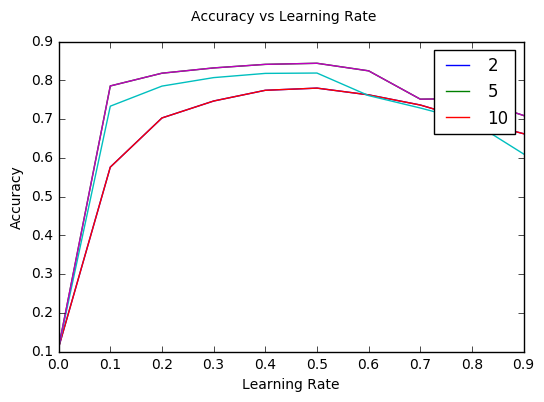

In [43]:
#Question 6.1.4.6
regu_rate=[]
result=[]
W1=[]
b1=[]
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
giter=[2,5,10]
for j in giter[:]:
    learning_rate=[]
    result=[]
    for i in range(10):
        learning_rate.append(0.1*i)
        W1,b1= classifier(data_X_train,data_Y_train,0.1*i,0.005,j)
        scores = np.dot(data_X_test, W1) + b1
        predicted_class = np.argmax(scores, axis=1)
        result.append(np.mean(predicted_class == data_Y_test))    
    plt.plot(learning_rate,result)
plt.suptitle('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend(['2', '5', '10'], loc='upper right')
plt.show()


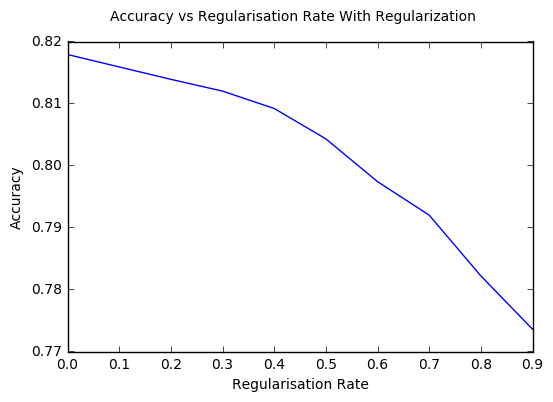

Best Accuracy with Regularization parameter  : 81.79 
Best Regularization parameter with Regularization parameter : 0.00000
Best Accuracy without Regularization parameter  : 81.79 


In [47]:
#Question 6.1.4.6
accuracy=[]
learning_rate=[]
regu_rate=[]
resultl=[]
W1=[]
b1=[]
resultr=[]
for j in range(10):
    regu_rate.append(0.1*j)
    W1,b1= classifier(data_X_train,data_Y_train,0.4,0.1*j,5)
    scores1 = np.dot(data_X_test, W1) + b1
    predicted_class = np.argmax(scores1, axis=1)
    resultr.append(np.mean(predicted_class == data_Y_test))
plt.plot(regu_rate,resultr)
plt.suptitle('Accuracy vs Regularisation Rate With Regularization')
plt.xlabel('Regularisation Rate')
plt.ylabel('Accuracy')
plt.show()
max_acc=max(resultr)
index=resultr.index(max_acc)
print ("Best Accuracy with Regularization parameter  : %.2f " % (max_acc*100))
print ("Best Regularization parameter with Regularization parameter : %.5f" % regu_rate[index])
resultr1=[]
for j1 in range(200):
    W2,b2= classifier(data_X_train,data_Y_train,0.4,0,5)
    scores2 = np.dot(data_X_test, W2) + b2
    predicted_class2 = np.argmax(scores2, axis=1)
    resultr1.append(np.mean(predicted_class2 == data_Y_test))
max_acc1=max(resultr1)
index1=resultr1.index(max_acc1)
print ("Best Accuracy without Regularization parameter  : %.2f " % (max_acc1*100))


In [ ]:
#Question 6.1.4.7
data_X_train50, data_X_test50, data_Y_train50, data_Y_test50 = train_test_split(data_X_train, data_Y_train, test_size=0.50)
W1_50,b1_50=classifier(data_X_train50,data_Y_train50,0.4,0.001,10)
train_scores50=np.dot(data_X_train50,W1_50) + b1_50
test_scores50 = np.dot(data_X_test50, W1_50) + b1_50
predicted_class_train50 = np.argmax(train_scores50, axis=1)
predicted_class_test50 = np.argmax(test_scores50, axis=1)
print (' Train accuracy with 50:50 split: %.2f' % (np.mean(predicted_class_train50 == data_Y_train50)*100))
Test_Acc50=(np.mean(predicted_class_test50 == data_Y_test50)*100)
print (' Test accuracy with 50:50 split: %.2f' % Test_Acc50)

In [37]:
def ffn(X,y,s,r,g_iter):
    
    
    #For simplicity we will take the batch size to be the same as number of examples
    num_examples = X.shape[0]
    h = 100
    D = data_X_train.shape[1] #Number of features
    K = 10 #Number of classes assuming class index starts from 0

    np.random.seed(1234)
    W = 0.01 * np.random.randn(D,h)
    b = np.zeros((1,h))
    W2 = 0.01 * np.random.randn(h,K)
    b2 = np.zeros((1,K))
    
    #Initial value for the Gradient Descent Parameter
    step_size = s #Also called learning rate

    #For simplicity, we will not hand tune this algorithm parameter as well.
    reg= r
    
    # gradient descent loop
    for i in range(g_iter):
      
  # evaluate class scores, [N x K]
        hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
        scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        #if i % 1 == 0:
            #print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
  # finally into W,b
        dW = np.dot(X.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W
  
  # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
        
    return(W,b,W2,b2)


In [30]:
#Question 6.1.5.1.4.3
W,b,W2,b2= ffn(data_X_train,data_Y_train,0.7,0.001,18)

hidden_layer = np.maximum(0, np.dot(data_X_train, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('train accuracy: %.2f' % (np.mean(predicted_class == data_Y_train)*100))

hidden_layer = np.maximum(0, np.dot(data_X_test, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
Test_Acc=(np.mean(predicted_class == data_Y_test)*100)
print ('Test accuracy: %.2f' % Test_Acc)

iteration 0: loss 2.306807
iteration 1: loss 2.300714
iteration 2: loss 2.293627
iteration 3: loss 2.282990
iteration 4: loss 2.265864
iteration 5: loss 2.237904
iteration 6: loss 2.192970
iteration 7: loss 2.123399
iteration 8: loss 2.021985
iteration 9: loss 1.885761
iteration 10: loss 1.720671
iteration 11: loss 1.543479
iteration 12: loss 1.375398
iteration 13: loss 1.230259
iteration 14: loss 1.110832
iteration 15: loss 1.013873
iteration 16: loss 0.935775
iteration 17: loss 0.878395
train accuracy: 75.92
Test accuracy: 75.83


In [34]:
#Question 6.1.5.1.4
from sklearn import cross_validation
cv = cross_validation.KFold(len(data_X_train), n_folds=3,shuffle=True, random_state=None)
#print(cv)
#Define some local varaibles
D = data_X_train.shape[1] #Number of features
K = 10 #Number of classes assuming class index starts from 0

# Start with an initialize parameters randomly
# Initial values from hyperparameter
reg = 1e-3 # regularization strength
result=[]

for traincv,testcv in cv:
   
    X_train, X_test = data_X_train[traincv], data_X_train[testcv]
    y_train, y_test = data_Y_train[traincv], data_Y_train[testcv]
    W,b,W2,b2=ffn(X_train,y_train,0.4,0.001,18)
    
    hidden_layer = np.maximum(0, np.dot(X_test, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    result.append(np.mean(predicted_class == y_test))
print ("Validation Accuracy: %.2f" % (np.array(result).mean()*100))
print ("Test Accuracy: %.2f" % Test_Acc) 

iteration 0: loss 2.306822
iteration 1: loss 2.303317
iteration 2: loss 2.299668
iteration 3: loss 2.295369
iteration 4: loss 2.289932
iteration 5: loss 2.282814
iteration 6: loss 2.273324
iteration 7: loss 2.260579
iteration 8: loss 2.243492
iteration 9: loss 2.220743
iteration 10: loss 2.190804
iteration 11: loss 2.152066
iteration 12: loss 2.103018
iteration 13: loss 2.042513
iteration 14: loss 1.970089
iteration 15: loss 1.886295
iteration 16: loss 1.792959
iteration 17: loss 1.693244
iteration 0: loss 2.306796
iteration 1: loss 2.303263
iteration 2: loss 2.299579
iteration 3: loss 2.295233
iteration 4: loss 2.289736
iteration 5: loss 2.282537
iteration 6: loss 2.272938
iteration 7: loss 2.260051
iteration 8: loss 2.242771
iteration 9: loss 2.219753
iteration 10: loss 2.189438
iteration 11: loss 2.150179
iteration 12: loss 2.100426
iteration 13: loss 2.039016
iteration 14: loss 1.965531
iteration 15: loss 1.880660
iteration 16: loss 1.786425
iteration 17: loss 1.686180
iteration 0:

5
10
18


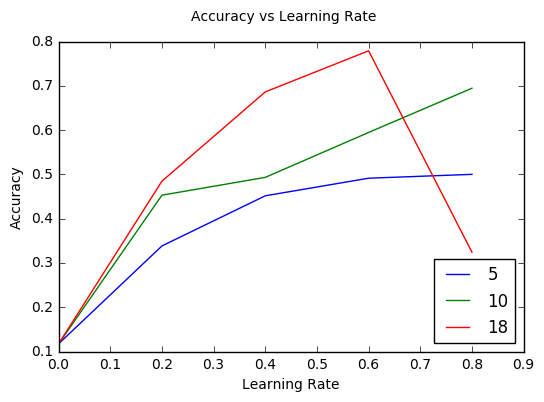

In [38]:
#Question 6.1.5.1.5
result=[]
W1=[]
b1=[]
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
giter=[5,10,18]
for j in giter[:]:
    learning_rate=[]
    result=[]
    for i in range(5):
        learning_rate.append(0.2*i)
        W,b,W2,b2= ffn(data_X_train,data_Y_train,0.2*i,0.001,j)
        hidden_layer = np.maximum(0, np.dot(data_X_test, W) + b)
        scores = np.dot(hidden_layer, W2) + b2
        predicted_class = np.argmax(scores, axis=1)
        result.append(np.mean(predicted_class == data_Y_test))    
    plt.plot(learning_rate,result)
    print(j)
plt.suptitle('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend(['5', '10','18'], loc='lower right')
plt.show()

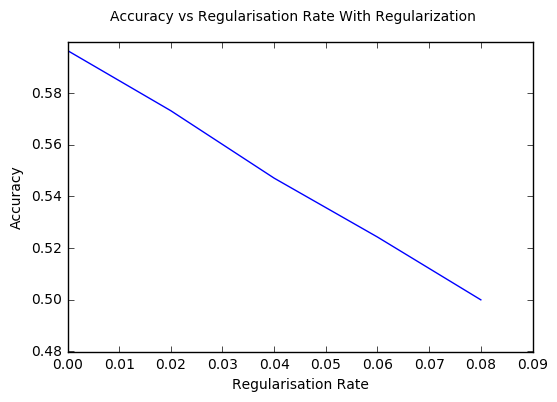

Best Accuracy with Regularization parameter  : 59.65 
Best Regularization parameter with Regularization parameter : 0.00000
Best Accuracy without Regularization parameter  : 57.32 


In [39]:
#Question 6.1.5.1.6
accuracy=[]
learning_rate=[]
regu_rate=[]
resultl=[]
W1=[]
b1=[]
resultr=[]
for j in range(5):
    regu_rate.append(0.02*j)
    W,b,W2,b2= ffn(data_X_train,data_Y_train,0.6,0.02*j,10)
    hidden_layer = np.maximum(0, np.dot(data_X_test, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    resultr.append(np.mean(predicted_class == data_Y_test))
plt.plot(regu_rate,resultr)
plt.suptitle('Accuracy vs Regularisation Rate With Regularization')
plt.xlabel('Regularisation Rate')
plt.ylabel('Accuracy')
plt.show()
max_acc=max(resultr)
index=resultr.index(max_acc)
print ("Best Accuracy with Regularization parameter  : %.2f " % (max_acc*100))
print ("Best Regularization parameter with Regularization parameter : %.5f" % regu_rate[index])
resultr1=[]
W,b,W2,b2= ffn(data_X_train,data_Y_train,0.6,0.02,10)
hidden_layer = np.maximum(0, np.dot(data_X_test, W) + b)
scores2 = np.dot(hidden_layer, W2) + b2
predicted_class2 = np.argmax(scores2, axis=1)
resultr1.append(np.mean(predicted_class2 == data_Y_test))
max_acc1=max(resultr1)
index1=resultr1.index(max_acc1)
print ("Best Accuracy without Regularization parameter  : %.2f " % (max_acc1*100))

In [41]:
#Question 6.1.5.1.7
data_X_train50, data_X_test50, data_Y_train50, data_Y_test50 = train_test_split(data_X_train, data_Y_train, test_size=0.50)
W,b,W2,b2=ffn(data_X_train50,data_Y_train50,0.6,0.001,10)
hidden_layer = np.maximum(0, np.dot(data_X_train, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('train accuracy with 50:50 split: %.2f' % (np.mean(predicted_class == data_Y_train)*100))

hidden_layer = np.maximum(0, np.dot(data_X_test, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
Test_Acc=(np.mean(predicted_class == data_Y_test)*100)
print ('Test accuracy with 50:50 split: %.2f' % Test_Acc)

train accuracy with 50:50 split: 63.41
Test accuracy with 50:50 split: 63.04


In [44]:
#Question 6.1.5.2
def ffnl(X,y,s,r,g_iter):
    #For simplicity we will take the batch size to be the same as number of examples
    num_examples = X.shape[0]
    h = 100
    np.random.seed(1234)
    W = 0.01 * np.random.randn(D,h)
    b = np.zeros((1,h))
    W2 = 0.01 * np.random.randn(h,K)
    b2 = np.zeros((1,K))
    
    #Initial value for the Gradient Descent Parameter
    step_size = s #Also called learning rate

    #For simplicity, we will not hand tune this algorithm parameter as well.
    reg= r
    
    # gradient descent loop
    for i in range(g_iter):
      
  # evaluate class scores, [N x K]
        #hidden_layer = np.maximum(0.01*x, np.dot(X, W) + b)# note, ReLU activation
        hidden_layer = np.maximum(np.dot(0.01*X,W)+b  , np.dot(X,W)+ b) # Leaky ReLU activation
        scores = np.dot(hidden_layer, W2) + b2
         
  # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        #if i % 1000 == 0:
            #print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] *= 0.01
  # finally into W,b
        dW = np.dot(X.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W
  
  # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
        
    return(W,b,W2,b2)

In [46]:
#Question 6.1.5.2.3

W,b,W2,b2= ffnl(data_X_train,data_Y_train,0.6,0.001,3)

hidden_layer = np.maximum(np.dot(0.01*data_X_train,W)+b  , np.dot(data_X_train,W)+ b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('train accuracy: %.2f' % (np.mean(predicted_class == data_Y_train)*100))

hidden_layer = np.maximum(np.dot(0.01*data_X_test,W)+b  , np.dot(data_X_test,W)+ b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
Test_Acc=(np.mean(predicted_class == data_Y_test)*100)
print ('Test accuracy: %.2f' % Test_Acc)


train accuracy: 43.06
Test accuracy: 43.35
